In [32]:
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

Kelly notes:
- I'm not fully sure how best to interact with the fasta file at the moment.
- There is an alignment of all 9,757 AA sequences on EggNOG but I haven't downloaded it.

In [48]:
tmprss2 = SeqIO.parse('KOG3627.fa', 'fasta')

In [8]:
tmprss2

# Sequence Metadata Exploration

Downloaded from [EggNOG](http://eggnog45.embl.de/#/app/results?seqid=O15393&target_nogs=KOG3627#KOG3627_datamenu) on 26 June 2020.

Kelly notes:
- column names are best guesses (other than species)
- some species are highly represented (Aedes sp., Culex sp., Anopheles sp., -- all mosquitos); these come from large genome sequencing projects
- is geography relevant here? do we expect population genetic structure in this gene? if we look at AA sequences rather than nucleotide sequences that will filter out neutral drift, but there may be variant sites that are partitioned by geography. we may want to find the localities from which the *Homo sapiens* samples were collected...

## Learning Objectives (WIP)

1. Manipulate data using `pandas`

    - count entries
    - calculate aggregate statistics
    - pivot and group data
    - add and drop columns
    
2. Learn how to identify and handle messy data

    - missing data
    - incomplete data
    
3. Learn how simple figures can help you to understand a dataset

4. Begin to explore how plotting tools can produce publication or presentation quality graphics

In [17]:
tmprss2_ext = pd.read_table('KOG3627_extended_members.txt', header=None)
tmprss2_ext.columns = ['id_1', 'id_2', 'species', '', '']

In [18]:
tmprss2_ext.head()

id_1       id_2                 species         \
0  CRE24749   CRE24749  Caenorhabditis remanei  31234   
1  CRE21132  CRE-TRY-4  Caenorhabditis remanei  31234   
2  CRE24758  CRE-TRY-6  Caenorhabditis remanei  31234   
3  CRE18672   CRE18672  Caenorhabditis remanei  31234   
4  CRE24729  CRE-TRY-3  Caenorhabditis remanei  31234   

                                                      
0  aliases:DS268562,E3N945_CAERE,E3N945,CRE_24749...  
1  aliases:E3MEX0,DS268440,E3MEX0_CAERE,CRE21132,...  
2  aliases:E3N963,DS268562,E3N963_CAERE,CRE24758,...  
3  aliases:DS268410,E3LKX4_CAERE,E3LKX4,CRE_18672...  
4  aliases:E3N418,DS268522,E3N418_CAERE,CRE24729,...

In [16]:
tmprss2_ext.shape

(9757, 5)

In [28]:
n_species = pd.DataFrame(tmprss2_ext.groupby('species')['id_1'].count())

In [29]:
n_species

id_1
species                               
6085                                32
9478                                58
Acyrthosiphon pisum                 87
Aedes aegypti                      354
Ailuropoda melanoleuca              92
...                                ...
Tupaia belangeri                    69
Tursiops truncatus                  88
Verticillium albo atrum VaMs.102     1
Xenopus (Silurana) tropicalis      126
Xiphophorus maculatus               88

[120 rows x 1 columns]

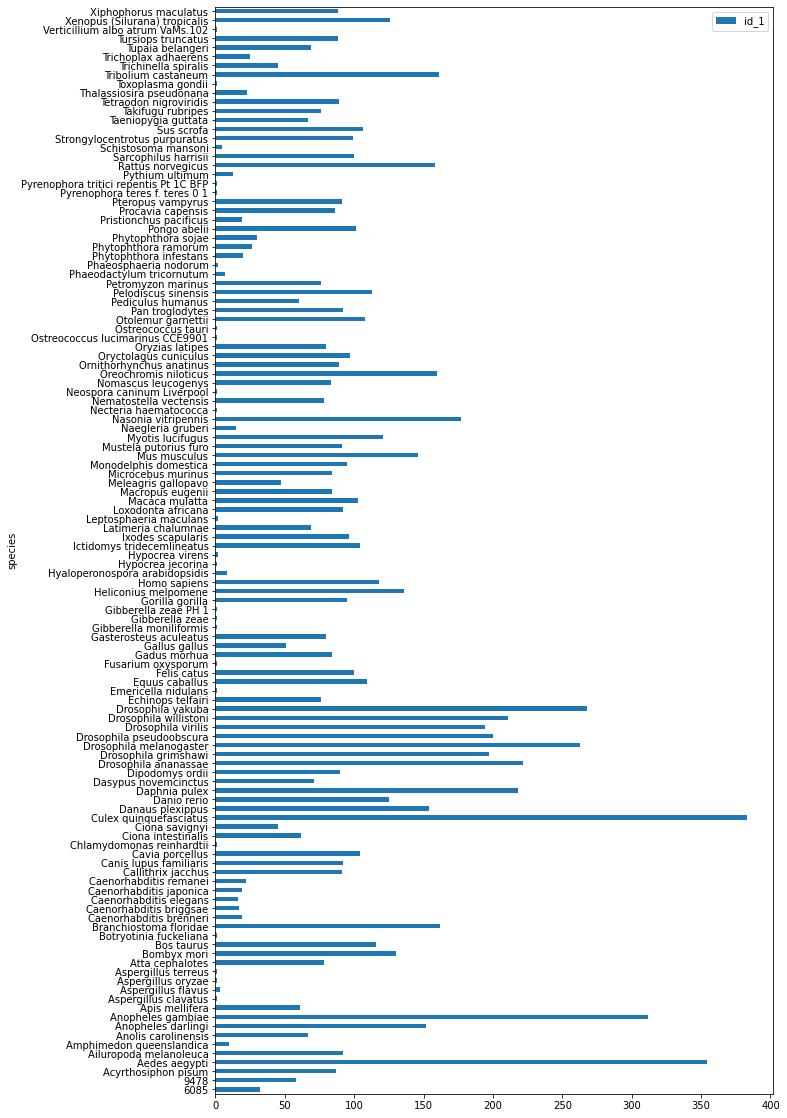

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10,20))
n_species.plot(kind="barh", ax=ax)

In [49]:
domestics = n_species[n_species.index.isin(['Homo sapiens', 'Mus musculus', 'Canis lupus familiaris', 'Felis catus', 'Bos taurus', 'Equus caballus', 'Gallus gallus'])]

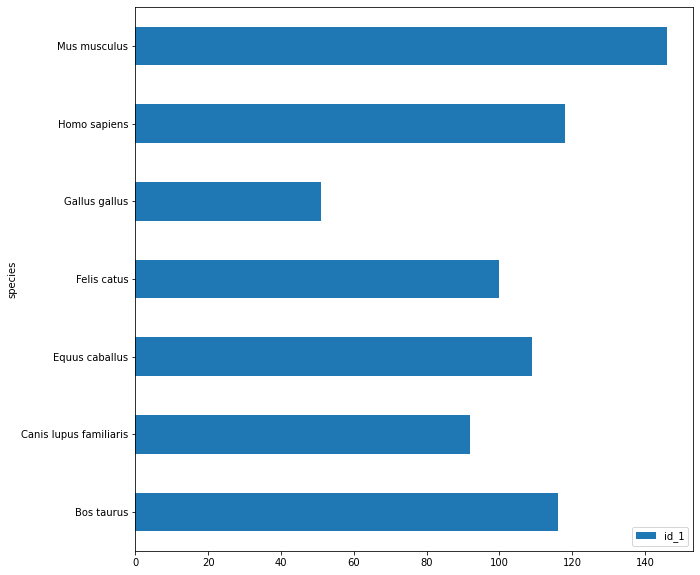

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
domestics.plot(kind="barh", ax=ax)